## Probability and Distributions

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### What is probability?

Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails.  You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.

This intuitive notion of odds is a **probability**. 

Consider another example. If we were tossing a 'fair' six-sided dice, we may thus equivalently say that the odds of the dice falling on any one of its sides is $1/6$. Indeed if there are $C$ different equally likely possibilities, we'd expect that the probability of any one particular outcome would be $1/C$.

The examples of the coin as well as the dice illustrate the notion of probability springing from **symmetry**. Here we think of probability of of the number 4 on the dice as the ratio:

$$\frac{Number\: of\: cases\: for\: number\: 4}{number\: of\: possibilities} = \frac{1}{6},$$
 assuming equally likely possibilities.



#### Probability from a model

But now think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelyhood of a candidate winning. However people do make **models** of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likeyhoods of candidates winning and run large numbers of **simulations** of the election, making predictions based on that. Forecasters like Nate Silver, Sam Wang, And Drew Linzer, made incredibly successfull predictions of the 2012 elections.

Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer **simulations** which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.

In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to **estimate** a probability, or the odds, of an **event** $E$ occuring. 


### Testing a model

We can test the model of a fair coin by having carried out a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

#### Probability as frequency

But, if you didnt know about the fairness of the coin, you can think of another notion probability as a **relative frequency**: if there are multiple ways an **event** like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened. 

#### Simulating the results of the model

We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6). 

In [19]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print "Throws:"," ".join(throws)
print "Number of Heads:", np.sum(throws=='H')
print "p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.

Throws: H T T T T T T H T H H T H T T H H T T T H T T H T T T H H T T H T T T H H T T H
Number of Heads: 15
p1 = Number of Heads/Total Throws: 0.375


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [20]:
throws=throw_a_coin(40)
print "Throws:"," ".join(throws)
print "Number of Heads:", np.sum(throws=='H')
print "p2 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.

Throws: T T H H H T T T H T H H T T H H T T T H H H H H T T T H H T T T T T T T T H T H
Number of Heads: 17
p2 = Number of Heads/Total Throws: 0.425


Let's do many more trials

In [21]:
throws=throw_a_coin(10000)
print "First 1000 Throws:"," ".join(throws)[:1000]
print "Number of Heads:", np.sum(throws=='H')
print "p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.

First 1000 Throws: H T T H H H T T H H T H T T T T H T T T H H T T H T H T T T T H T T T T T T T H T T H H H T H T T T T T H H H H T T H H T H H H H H H T H H T H T T H H H H H H T T H T T T H H T H T H T H T T H T T H H H T T H T H T H T T T H H T T H T H T T H H T T T H H H H H T H T H H H H T H T T H H T H H H H H H T T H T T H H T H H H T H H T H T T H T T T T H H T T H H H T H T H T H T H T T T T H T T T H H T H T T H T H T T H T T T H H H H T H T H T T T H T H T H T T H H H T H H T H H T H T H T T T H H T H T T H T H T H H H H H H T H H H T H T T T T T H T H H T T T T H H H H H T T T H H T H H H T T T H T T T T T T H H H T H H T T H H T T T T H H T H T T T H T H T T T H T T H H H T H H T T H H T T H H H T H T T T H H H T T H H H H H T H H H H T H H H T H H H H T H H H H H H H H H H T T H T T H T T H H H T T T H H T T H H H T H T H H H H H H T H H H H H T H T H H H T T T T H H H H T H T H T H T H H T T T T H H T T T H T H H H T T H H T T T T H H T T T T H T T T H H H T H H H T H H

The larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

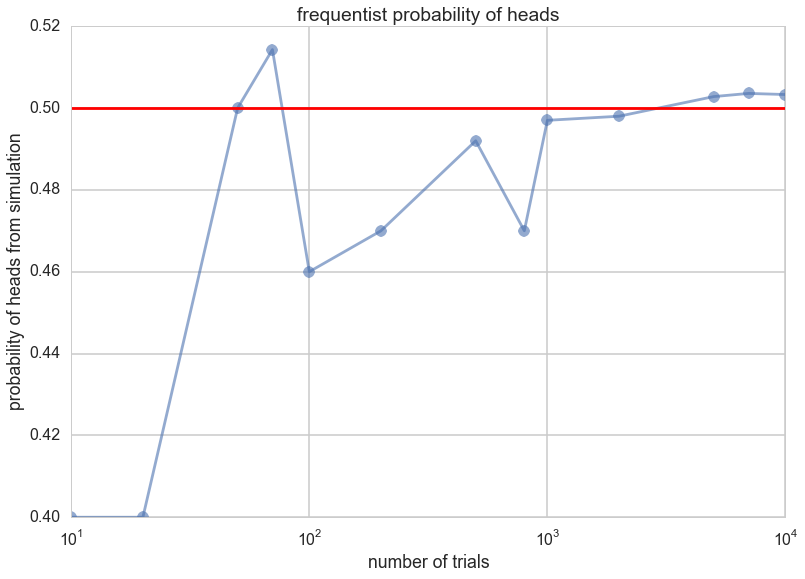

In [22]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller as the number of trials increases. These **fluctations** are what give rise to probability distributions.

Each finite length run is called a **sample**, which has been obtained from the **generative** model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model. 

### A simple Election Model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that [PredictWise](http://www.predictwise.com/results/2012/president) made on October 2, 2012 for the US presidential elections. 
PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [2]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


Each row is the probability predicted by Predictwise that Romney or Obama would win a state. The votes column lists the number of electoral college votes in that state. 

Remember that simulation is used in different ways in the modelling process. Simulations might be used to propagate differential equations which describe the weather from different initial conditions. In this case they are used to create the model. In the coin flips case, they are used to illustrate the predictions of the model of a fair coin. This example is in the same spirit: we are given a (somehow obtained) list of win probabilities for the states of the US. 

In the case of the tossed coins, even though we had a model which said that the probability of heads was 0.5, there were sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 10000 replications with an election each, Romney would win in 938 of those Arizonas **on the average** across the replications. And there would be some samples with Romney winning more, and some with less. We can run these **simulated** universes on a computer though not in real life.

#### Simulating the model

To do this, 
we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function `simulate_election` that uses this **predictive model** to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this `n_sim` times and return a list of total Obama electoral votes in each simulation.

#### -------- sandbox -----------

In [39]:
probabilities = predictwise.Obama.values
votes = predictwise.Votes.values
simulations = np.random.uniform(size=(51,))
print(simulations.shape, probabilities.shape)
(simulations < probabilities).shape
print(np.sum((simulations < probabilities) * votes))


(51,) (51,)
343


In [44]:
def simulate_election2(model):
    simulations = np.random.uniform(size=(51,))
    obama_votes = (simulations < model.Obama.values) * model.Votes.values
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum()

In [50]:
simulate_election2(predictwise)

325

In [57]:
result = np.array([simulate_election2(predictwise) for i in range(10000)])
print ((result >= 269).sum())

9963


In [59]:
A = np.array([[1,2,3], [10,20,30]])
A

array([[ 1,  2,  3],
       [10, 20, 30]])

In [62]:
v = np.array([[2], [20]])
v

array([[ 2],
       [20]])

In [63]:
A <= v

array([[ True,  True, False],
       [ True,  True, False]], dtype=bool)

#### -----------------------------

In [64]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

The following code takes the necessary probabilities for the Predictwise data, and runs 10000 simulations. If you think of this in terms of our coins, think of it as having 51 biased coins, one for each state, and tossing them 10,000 times each.

We use the results to compute the number of simulations, according to this predictive model, that Obama wins the election (i.e., the probability that he receives 269 or more electoral college votes)

In [66]:
result = simulate_election(predictwise, 10000)
print ((result >= 269).sum())

9968


In [67]:
result

array([303, 347, 335, ..., 332, 347, 332])

There are roughly only 50 simulations in which Romney wins the election!

#### Displaying the prediction

Now, lets visualize the simulation. We will build a histogram from the result of `simulate_election`. We will **normalize** the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie. 

We also display the probability of an Obama victory    
    

In [99]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(250, 400, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

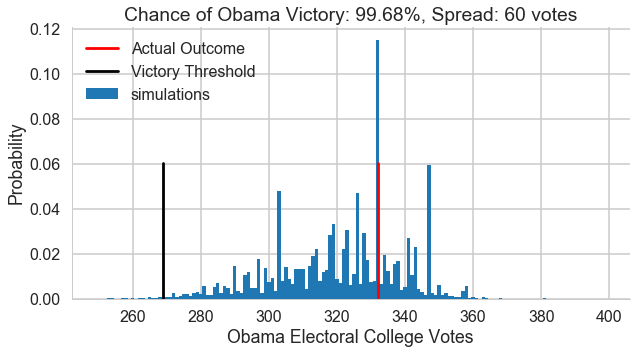

In [100]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the **predictive distribution**. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a **probability distribution** or **probability mass function**. 

### Random Variables

From wikipedia: In probability theory, the **sample space** of an experiment or random trial is the set of all possible outcomes or results of that experiment. For one coin toss, [H,T] make up the sample space.

A **random variable** is a mapping from a sample space to the set of real numbers. It assigns a real number to each outcome in the sample space.

For example, consider the event of a coin toss that we have seen before. There are two outcomes in the sample space, a heads and a tails. We can ask the question, whats the probability of a heads or a tails? For an unbiased coin, these are, by symmettry, 1/2 each. The random variable here is the number of heads, and its probability is P(0)=1/2, and P(1)=1/2.

Another random variable is the number of heads in two coin tosses. There,  P(0)=1/4, P(1)=1/2, P(2)=1/4.

Random variables provide the link from events and sample spaces to data, and it is their **probability distribution** that we are interested in.

A random variable is called **discrete** if it has a countable number of values ^[The technical definition of countable is that there is a 1-1 correspondence with the integers 1,2,3...]. The number of heads in 2 coin tosses is a discrete random variable.

### Bernoulli Random Variables (in scipy.stats)

The **Bernoulli Distribution** represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin). 

We then say:

$$X \sim Bernoulli(p),$$

which is to be read as **X has distribution Bernoulli(p)**. The **probability distribution function (pdf)** or **probability mass function** associated with the Bernoulli distribution is

\begin{eqnarray}
P(X = 1) &=& p \\
P(X = 0) &=& 1 - p 
\end{eqnarray}

for p in the range 0 to 1. 
The **pdf**, or the probability that random variable $X=x$ may thus be written as 

$$P(X=x) = p^x(1-p)^{1-x}$$

for x in the set {0,1}.

The **mean**, or **expected value** of this distribution can be calculated analogously to the mean value of data by noting that X=1 happens with frequency p*N, and X=0 happens with frequency (1-p)*N, so we have

$$\frac{p \times N \times 1+(1-p) \times N \times 0}{N}$$

and thus it is p. 

Let us engage in some term defining right now. $X$ is a random variable, and when we say $X=x$ we are asking "what if the random variable X takes the value x. $P(X=x)$ asks: what is the probability that the random variable X takes the value x. Finally $p$ is a parameter of the Bernoulli distribution, and as we have seen, one of the things we want to do in data analysis is: having seen some data, what can we infer to be the values of p, so that we can make future predictions for X.

In [101]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

Note: **some of the code, and ALL of the visual style for the distribution plots below was shamelessly stolen from https://gist.github.com/mattions/6113437/ **.

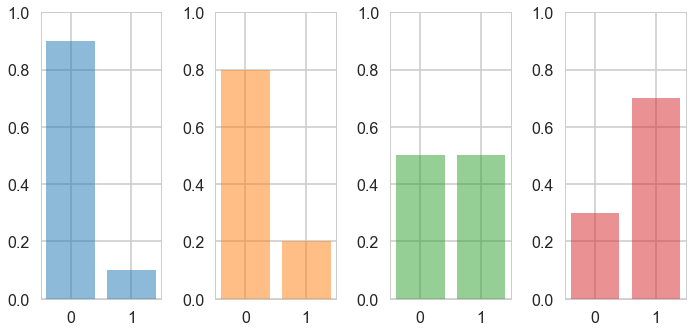

In [112]:
event_space=[0,1]
plt.figure(figsize=(10,5))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    # plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    # plt.legend(loc=0)
    # if i == 0:
        # plt.ylabel("PDF at $k$")
plt.tight_layout()

Let us parse the intent of the above code a bit. We run 10,000 simulations. In each one of these simulations, we toss 51 biased coins, and assign the vote to obama is the output of `np.random.uniform` is less than the probablity of an obama win. 

### Uniform Distribution (in numpy)

The first thing to pick up on here is that `np.random.uniform` gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the **Uniform Distribution**.

We then say:

$$X \sim Uniform([0,1),$$

which is to be read as **X has distribution Uniform([0,1])**. The **probability distribution function (pdf)** associated with the Uniform distribution is

\begin{eqnarray}
P(X = x) &=& 1 \, for \, x \in [0,1] \\
P(X = x) &=& 0 \, for \, x \notin [0,1]
\end{eqnarray}

What assigning the vote to Obama when the random variable **drawn** from the Uniform distribution is less than the Predictwise probability of Obama winning (which is a Bernoulli Parameter) does for us is this: if we have a large number of simulations and $p_{Obama}=0.7$ , then 70\% of the time, the random numbes drawn will be below 0.7. And then, assigning those as Obama wins will hew to the frequentist notion of probability of the Obama win. But remember, of course, that in 30% of the simulations, Obama wont win, and this will induce fluctuations and a distribution on the total number of electoral college votes that Obama gets. And this is what we see in the histogram below. 

### Empirical Distribution

This is an **empirical Probability Mass Function** or **Probability Density Function**.  The word **density** is strictly used when the random variable X takes on continuous values, as in the uniform distribution, rather than discrete values such as here, but we'll abuse the language and use the word probability distribution in both cases.

Lets summarize: the way the density arose here that we did ran 10,000 tosses (for each state), and depending on the value, assigned the state to Obama or Romney, and then summed up the electoral votes over the states.

There is a second, very useful question, we can ask of any such probability density: what is the probability that a random variable is less than some value. In other words: $P(X < x)$. This is *also* a probability distribution and is called the **Cumulative Distribution Function**, or CDF (sometimes just called the **distribution**, as opposed to the **density**). Its obtained by "summing" the probability density function for all $X$ less than $x$.

In [118]:
np.sum(result < 300) / result.shape[0]

0.14360000000000001

In [122]:
np.arange(0, 540, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535])

In [121]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print ("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1436
Obama Win CDF at votes= 320  is  0.4417
Obama Win CDF at votes= 340  is  0.8387
Obama Win CDF at votes= 360  is  0.9984
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


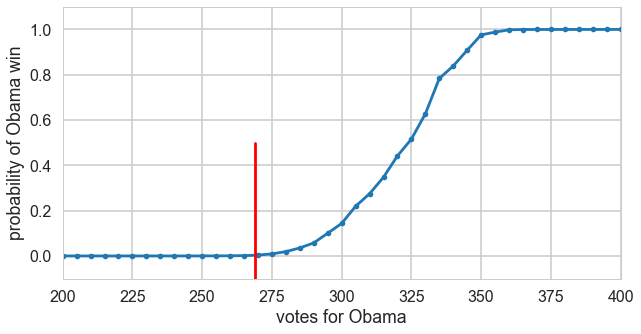

In [124]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");
plt.axvline(269, 0, .5, color='r', label='Victory Threshold');

### Binomial Distribution (in scipy.stats)

Let us consider a population of coinflips, n of them to be precise, $x_1,x_2,...,x_n$. The distribution of coin flips is the binomial distribution. By this we mean that each coin flip represents a bernoulli random variable (or comes from a bernoulli distribution) with  mean $p=0.5$.

At this point, you might want to ask the question, what is the probability of obtaining $k$ heads in $n$ flips of the coin. We have seen this before, when we flipped 2 coins. What happens when when we flip 3?

(This diagram is taken from the Feynman Lectures on Physics, volume 1. The chapter on probability is http://www.feynmanlectures.caltech.edu/I_06.html)
![3 coin flips](3flips.png)

We draw a possibilities diagram like we did with the 2 coin flips, and see that there are different probabilities associated with the events of 0, 1,2, and 3 heads with 1 and 2 heads being the most likely. 
The probability of each of these events is given by the **Binomial Distribution**, the distribution of the number of successes in a sequence of $n$ independent yes/no experiments, or Bernoulli trials, each of which yields success with probability $p$. The Binomial distribution is an extension of the Bernoulli when $n>1$ or the Bernoulli is the a special case of the Binomial when $n=1$.   

$$P(X = k; n, p) = {n\choose k}p^k(1-p)^{n-k} $$

where

$${n\choose k}=\frac{n!}{k!(n-k)!}$$

The expected value $E[X]=np$ and the variance is $Var[X]=np(1-p)$

How did we obtain this? The $p^k(1-p)^{n-k}$ comes simply from multiplying the probabilities for each bernoulli trial; there are $k$ 1's or yes's, and $n-k$ 0's or no's. The ${n\choose k}$ comes from counting the number of ways in which each event happens: this corresponds to counting all the paths that give the same number of heads in the diagram above.

We show the distribution below for 200 trials.

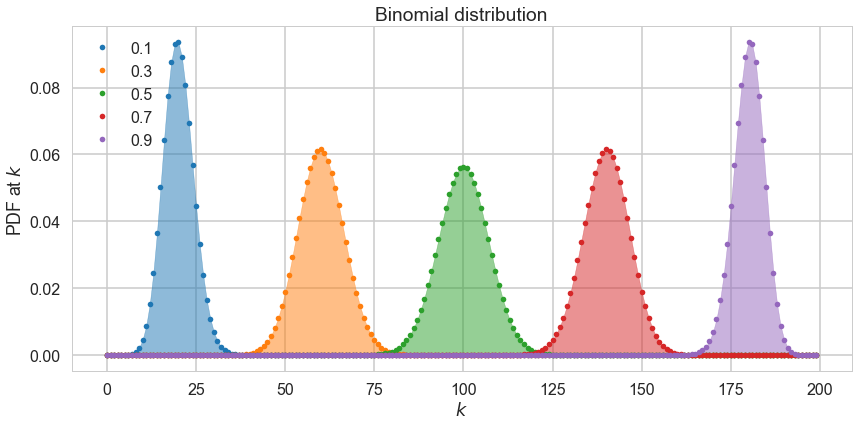

In [125]:
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

### The various ways to get random numbers

1. `np.random.choice` chooses items randomly from an array, with or without replacement
2. `np.random.random` gives us uniform randoms on [0.0,1.0)
3. `np.random.randint` gives us random integers in some range
4. `np.random.randn` gives us random samples from a Normal distribution, which we talk about later.
5. `scipy.stats.distrib` gives us stuff from a distribution. Here distrib could be `binom` for example, as above. `distrib.pdf` or `distrib.pmf` give us the density or mass function, while `cdf` gives us the cumulaive distribution function. Just using `distrib` as a function with its params creates a random variable generating object, from which random variables can be generated in the form `distrib(params).rvs(size)`.